## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## **Loading the dataset**

In [ ]:
# Mounting google drive and initilizing path variable
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/PGPAIML/Project-6/'

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
original_data = pd.read_csv(path+'stock_news.csv') #delimiter="\t", encoding='utf-8')

In [ ]:
# creating a copy of the data
data = original_data.copy()

## **Data Overview**

In [ ]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
data.shape

(349, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observation**

  - No missing values – All columns have 349 non-null entries.
  - Data Types:
    - Date & News are object types.
    - Stock prices & Volume are numeric (float64 & int64).
    - Label is an integer (expected, since sentiment labels are -1, 0, and 1).
  - **We need to convert Date as Object to a Date-Time datatype.**


In [ ]:
# Converting 'Date' column from Onject to panda's datetime data type
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,349,NaN,NaN,NaN,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
News,349,349,"In the first quarter, South Korea's Samsung E...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,349.0,NaN,NaN,NaN,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,NaN,NaN,NaN,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,NaN,NaN,NaN,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,NaN,NaN,NaN,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,NaN,NaN,NaN,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,NaN,NaN,NaN,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


In [ ]:
# Creating new dataframe to calculate Price difference in a given data. This is only for analysis price difference can be negetive
df = pd.DataFrame()
df["Price_Diff"] = data["High"] - data["Low"]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_Diff,349.0,0.955064,0.485368,0.357498,0.564998,0.837502,1.129997,2.822499


In [ ]:
# Checking for missimg values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

**Observations**

- Stock Price Trends
  - Opening Price - Mean \$46.23, Min: \$37.57, Max: \$66.81.
  - Closing Price - Mean: \$44.92, Min: \$36.25, Max: \$64.80.
- Variation in prices indicate volatility.
- Price Difference (High - Low): \$46.70, Mean low: \$45.74.
- Trade Volume: Mean 128.9M shares, Min 45.4M, Max 244.4M.
- High trading volume indication of market interest.
- Sentiment: Standard deviation 0.71, (mix of sentiments or positive sentiment?).
- No null or duplicate values.

## **Exploratory Data Analysis**

### Univariate Analysis

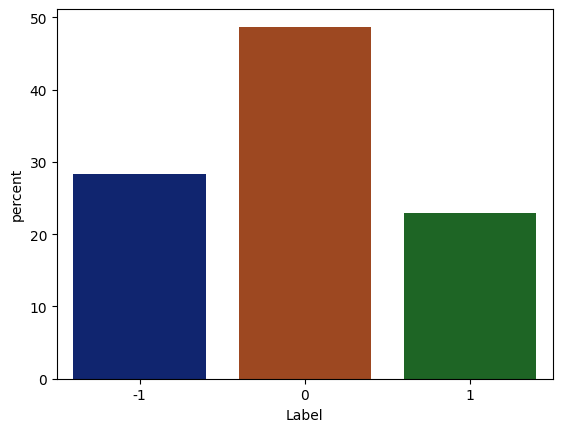

In [ ]:
sns.countplot(data=data, x='Label', stat='percent', palette='dark');

* Distribution of individual variables

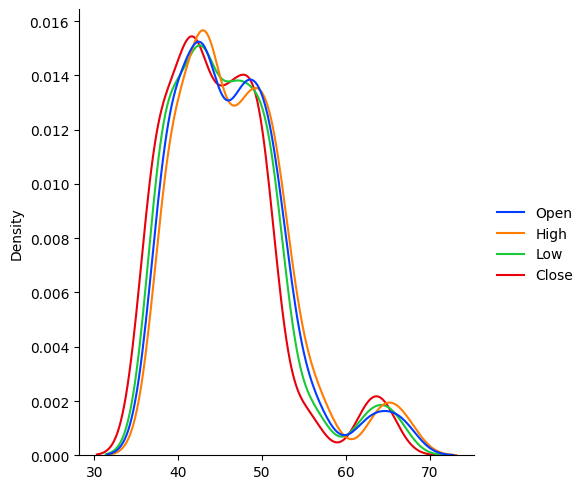

In [ ]:
sns.displot(data=data[['Open','High','Low','Close']], kind="kde", palette="bright")

<Axes: xlabel='Volume', ylabel='Count'>

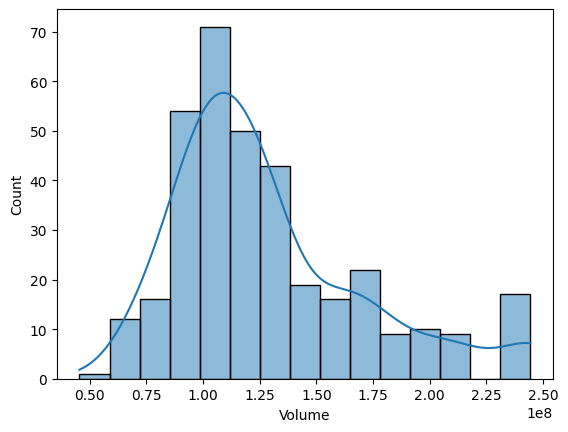

In [ ]:
sns.histplot(data, x='Volume', kde=True, palette='dark')

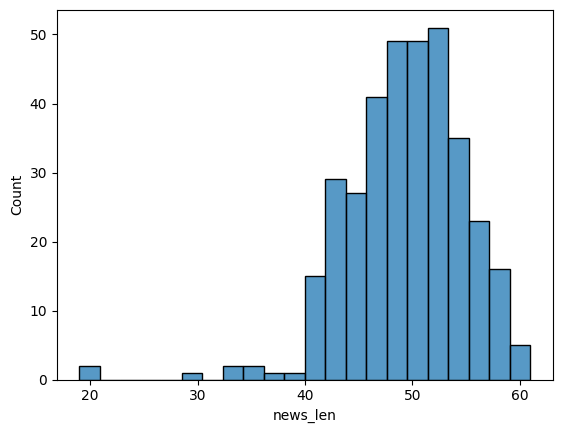

In [ ]:
data['news_len'] = data['News'].apply(lambda x: len(x.split(' ')))
sns.histplot(data, x='news_len');

**Observations**

**1. Sentiment Distribution**
- Neutral sentiment (less than 50%) dominates, followed by negative (around 30%) and positive (around 20%).
- Indicates potential **class imbalance**, which might require handling.
- The lower proportion of **positive** news articles suggests fewer instances for learning positive sentiment.

**2. Stock Price Distribution**
- Open, High, Low, and Close prices follow a similar distribution.
- Prices peak around \$40 - $50.

**3. Trade Volume Distribution**
- Trade volume follows a slightly right-skewed distribution.
- Most trading volumes are concentrated around 1.0 - 1.5.

**4. News Length Distribution**
- The majority of news articles have 40-55 words.
- There are very few small news articles (~20 words).
- News length is relatively consistent.







### Bivariate Analysis

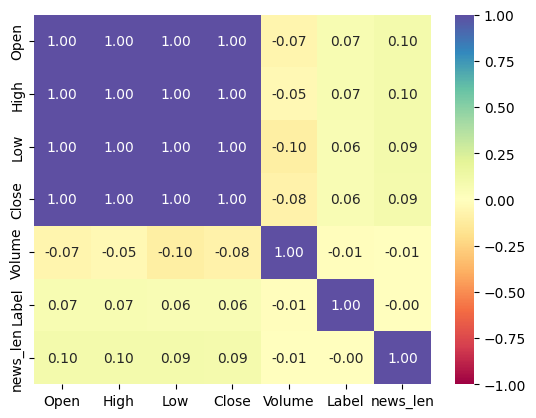

In [ ]:
# Heatmap for all numerical columns
sns.heatmap(
    data.select_dtypes(include=['number']).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

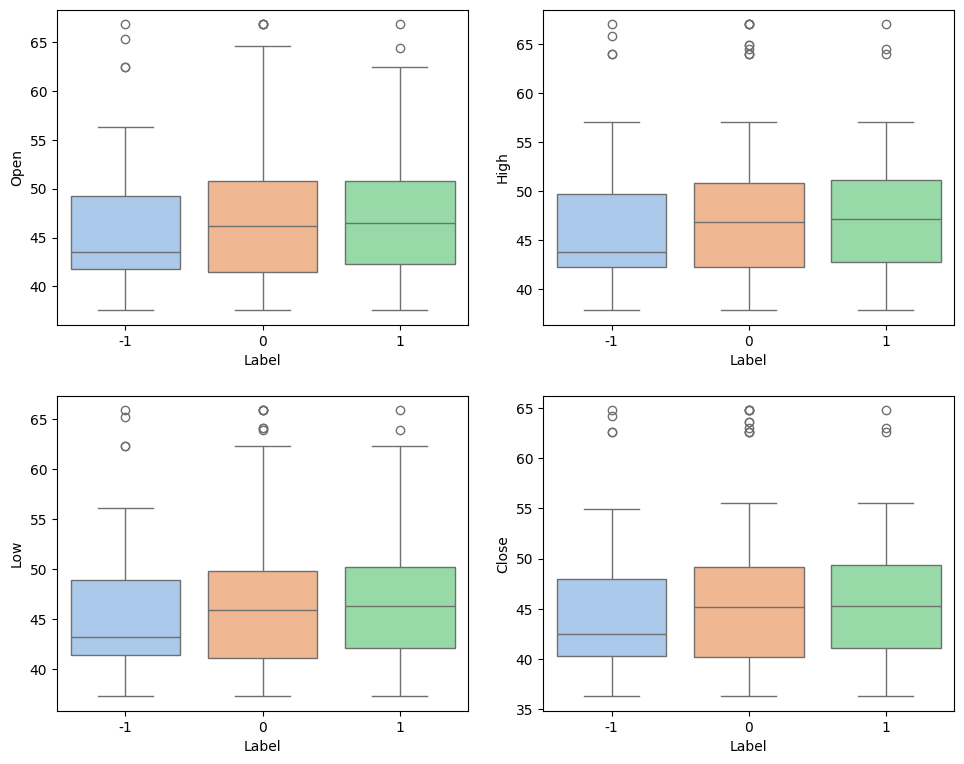

In [ ]:
# Box plot for days stock prices by target sentiment
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x="Label", y=variable, palette='pastel')
    plt.tight_layout(pad=2)

plt.show()

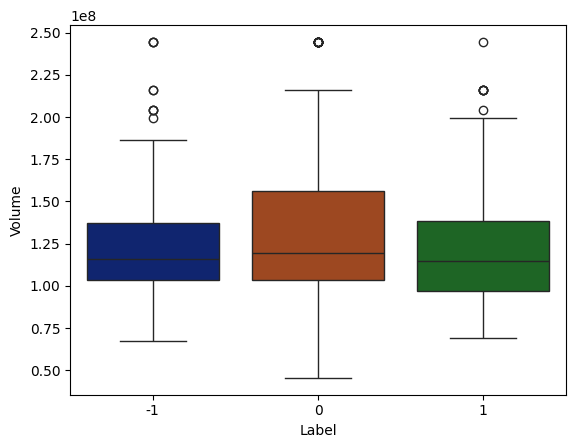

In [ ]:
# Boxplot of trade volume by setiment
sns.boxplot(
    data=data, x='Label', y='Volume', palette='dark'
);

In [ ]:
# Creating new data-set for stock prices by date, taking mean value of Open, Close, High & Lonw. Also mean of Volume.
stock_daily = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


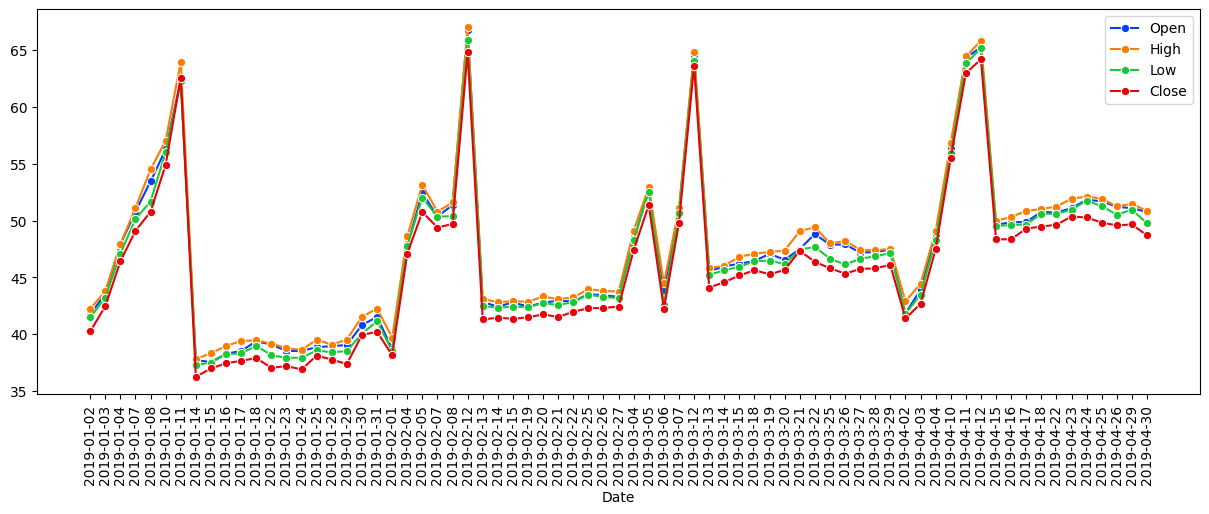

In [ ]:
# Creating line plot for days mean / average prices for each given day.
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop('Volume', axis=1), palette='bright', dashes=False, marker='o');
plt.xticks(rotation=90)
plt.show()

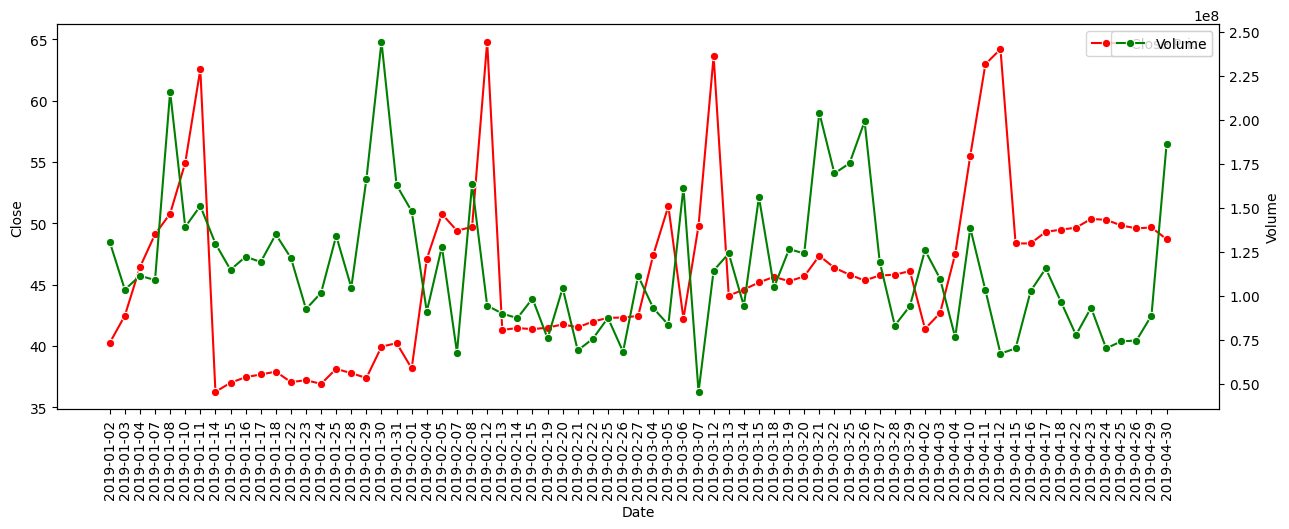

In [ ]:
# Creating line plot for closing price & trade volum by day to visualize if they are related or not.
fig, ax1 = plt.subplots(figsize=(15,5))
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='red', marker='o', label='Close Price')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='green', marker='o', label='Volume')
plt.xticks(rotation=90)
ax1.legend(bbox_to_anchor=(1,1));
plt.show()

**Observations**

**1. Correlation Heatmap**
- Stock prices (Open, High, Low, Close) are highly correlated **(1.00)**, which is expected behaviour.
- Sentiment has weak correlations with stock prices (0.07 - -0.1). This seems to be indicative, that sentiment (alone) may not have a strong effect on price.
- News Length and Stock Prices havery very weak correlation (0.09). This could be a random effect.

**2. Sentiment vs. Stock Prices**
- There is no clear separation between different sentiment categories. The median values for all price points are quite similar across positive, neutral, and negative sentiment labels.
- Some **outliers** exist, this might be indication of other market factors.

**3. Sentiment vs. Trade Volume**
- Trade volume distribution is similar across sentiments.
- Outliers exist for all sentiment categories, suggests high trading activity on some specific days.

**4. Stock Price Trends by Day**
- The Open, High, Low, and Close prices move in parallel.
- There exists several sharp spikes and drops, days with high volatility.

**5. Stock Close Price vs. Volume by Day**
- Some high trading volume coincide with major price changes.
- There are periods where volume increases but price remains stable.


## **Data Preprocessing**

In [ ]:
data['Date'].describe().T

,Date
count,349
unique,71
top,2019-01-03
freq,28


**Observations**

Since we are working with time-series data, we should split the dataset in a chronological order:

- Training Set (70%) → Used to train the model on historical data.
- Validation Set (15%) → Used to fine-tune hyperparameters and prevent overfitting.
- Test Set (15%) → Used to evaluate model performance on unseen future data.

### Splitting the dataset

In [ ]:
# Calculating size of each data-set
df = data.sort_values(by="Date")

train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

# Splitting the by datetime.
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

Train size: 244, Validation size: 52, Test size: 53


In [ ]:
# Define the feature columns (excluding 'Label' which is the target)
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'News']  # Add 'News' if using NLP features

# Splitting Train Data
X_train = train_data[feature_columns]
y_train = train_data['Label']

# Splitting Validation Data
X_val = val_data[feature_columns]
y_val = val_data['Label']

# Splitting Test Data
X_test = test_data[feature_columns]
y_test = test_data['Label']

# Display shapes of the datasets
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (244, 6), y_train: (244,)
X_val: (52, 6), y_val: (52,)
X_test: (53, 6), y_test: (53,)


### Serializig the data

In [ ]:
#Store Data
# Saving all the data sets so that we can read them back if required, later.
X_train.to_csv(path+'X_train')
X_val.to_csv(path+'X_val')
X_test.to_csv(path+'X_test')
y_train.to_csv(path+'y_train')
y_val.to_csv(path+'y_val')
y_test.to_csv(path+'y_test')

In [ ]:
#Load Data
# Read splitted datasets not needed when session is current.
X_train=pd.read_csv(path+'X_train', index_col=0)
X_val=pd.read_csv(path+'X_val', index_col=0)
X_test=pd.read_csv(path+'X_test', index_col=0)
y_train=pd.read_csv(path+'y_train', index_col=0)
y_val=pd.read_csv(path+'y_val', index_col=0)
y_test=pd.read_csv(path+'y_test', index_col=0)

## **Word Embeddings**

### Utility functions

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

In [ ]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to compute the vector representation for a sentence
def vectorize_sentence_wv(sentence, model, vector_size):
    feature_vector = np.zeros(vector_size)  # Step 1: Initialize feature vector
    valid_words = [word for word in sentence if word in model.wv]  # Step 2: Filter words in model vocabulary

    if len(valid_words) > 0:
        feature_vector = np.sum([model.wv[word] for word in valid_words], axis=0)  # Step 3: Sum vectors
        feature_vector /= len(valid_words)  # Step 4: Average the vectors

    return feature_vector



In [ ]:
def vectorize_sentence_gv(sentence, model, vector_size):
    feature_vector = np.zeros(vector_size)  # Initialize feature vector
    valid_words = [word for word in sentence if word in model]  # Keep words in GloVe vocab

    if len(valid_words) > 0:
        feature_vector = np.sum([model[word] for word in valid_words], axis=0)  # Sum vectors
        feature_vector /= len(valid_words)  # Average the vectors

    return feature_vector


### Text cleaning and creating a **Word2Vec**

In [ ]:
# Apply cleaning function to the News column
df['cleaned_news'] = data['News'].astype(str).apply(clean_text)

# Flatten the list of words
word_list = [word for words in df['cleaned_news'] for word in words]
# Display the first 20 words for verification
print(word_list[:20])

['tech', 'sector', 'experienced', 'significant', 'decline', 'aftermarket', 'following', 'apple', 'q1', 'revenue', 'warning', 'notable', 'supplier', 'including', 'skyworks', 'broadcom', 'lumentum', 'qorvo', 'tsmc', 'saw']


In [ ]:
X_train['cleaned_news'] = X_train['News'].astype(str).apply(clean_text)
X_val['cleaned_news'] = X_val['News'].astype(str).apply(clean_text)
X_test['cleaned_news'] = X_test['News'].astype(str).apply(clean_text)

In [ ]:
# Define Word2Vec parameters
vec_size = 100  # using 100 as we have less than 1K news articles.

# Train the Word2Vec model
w2v_model = Word2Vec(sentences=df['cleaned_news'], vector_size=vec_size, min_count=1, window=5, workers=6)

# Save the model
w2v_model.save("word2vec_model_1.model")

# Get vector representation of a word
word = "stock"
if word in w2v_model.wv:
    print(f"Vector for '{word}':\n", w2v_model.wv[word])

# Find similar words
print("\nMost similar words to 'stock':", w2v_model.wv.most_similar("stock", topn=5))

Vector for 'stock':
 [-1.26079628e-02  1.43854422e-02  9.87961702e-03  4.92452737e-03
  9.33055580e-03 -2.06732284e-02  7.80736096e-03  2.82788668e-02
 -8.65586568e-03 -1.24492273e-02 -6.19018590e-03 -2.54446436e-02
 -8.08156747e-03  1.25669008e-02  5.88114467e-03  3.25407455e-04
  7.19970465e-03 -4.60193167e-03 -3.73106741e-04 -2.01679748e-02
  9.67807043e-03  1.43489824e-03  1.60216354e-02 -1.40979541e-02
  2.42970791e-03  3.57994298e-03 -1.34489015e-02 -3.12900124e-03
 -1.04135545e-02  6.17367541e-03  2.14739610e-02 -1.31761585e-03
  1.95503840e-03 -1.31854331e-02  3.23697081e-04  1.47552611e-02
  7.10454443e-03 -4.37183306e-03  1.99492136e-03 -1.37420259e-02
  9.37174913e-03 -1.65933855e-02 -1.48067689e-02 -4.81401046e-04
  5.23545500e-03  3.83406482e-03 -5.48865180e-03 -3.28994379e-03
  6.72310311e-03  9.61985160e-03  1.16098858e-02 -1.89655107e-02
 -5.02463151e-03  2.17578514e-03 -6.75247330e-03  1.59547664e-02
  1.49933072e-02  5.19891316e-03 -1.16280476e-02  1.07989125e-02
 -6.

In [ ]:
# Compute sentence embeddings for each cleaned news article
x_train_wv = pd.DataFrame(X_train['cleaned_news'].apply(lambda x: vectorize_sentence_wv(x, w2v_model, vec_size)).to_list())
x_val_wv = pd.DataFrame(X_val['cleaned_news'].apply(lambda x: vectorize_sentence_wv(x, w2v_model, vec_size)).to_list())
x_test_wv = pd.DataFrame(X_test['cleaned_news'].apply(lambda x: vectorize_sentence_wv(x, w2v_model, vec_size)).to_list())

print(x_train_wv.shape, x_val_wv.shape, x_test_wv.shape)


(244, 100) (52, 100) (53, 100)


### Creating the set of sentence vector using **GloVe**

In [ ]:
# Load the Stanford GloVe model
filename = 'glove.6B.100d.word2vec.txt'
glove_model = KeyedVectors.load_word2vec_format(path+filename, binary=False)
print("Vocabulary size", len(glove_model.index_to_key))

Vocabulary size 400000


In [ ]:
# Compute sentence embeddings for each cleaned news article
x_train_gv = pd.DataFrame(X_train['cleaned_news'].apply(lambda x: vectorize_sentence_gv(x, glove_model, vec_size)).to_list())
x_val_gv = pd.DataFrame(X_val['cleaned_news'].apply(lambda x: vectorize_sentence_gv(x, glove_model, vec_size)).to_list())
x_test_gv = pd.DataFrame(X_test['cleaned_news'].apply(lambda x: vectorize_sentence_gv(x, glove_model, vec_size)).to_list())

print(x_train_gv.shape, x_val_gv.shape, x_test_gv.shape)

(244, 100) (52, 100) (53, 100)


### Creating a set of sectence vector using **Sentence Transformer - ('sentence-transformers/all-MiniLM-L6-v2')**

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train_st = model.encode(X_train['cleaned_news'].values, show_progress_bar=True, device=device)
x_val_st = model.encode(X_val['cleaned_news'].values, show_progress_bar=True, device=device)
x_test_st = model.encode(X_test['cleaned_news'].values, show_progress_bar=True, device=device)
print(x_train_st.shape, x_val_st.shape, x_test_st.shape)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

(244, 384) (52, 384) (53, 384)


### **Observations**

- Each news content has been converted to a 100-dimensional vector using **Word2Vec**
- Each news content has been converted to a 100-dimensional vector using **GloVe**
- Each news content has been converted to a 384-dimensional vector using **Transformer - ('sentence-transformers/all-MiniLM-L6-v2')**



## **Sentiment Analysis**

### Model Evaluation Criteria

To assess the effectiveness of the sentiment analysis model, we should use the following key evaluation criteria:

**Important Note**: The dataset is not perfectly balanced because the Neutral class (0) dominates. However, it is not highly imbalanced either, since both Positive and Negative classes have a reasonable number of samples.

1. F1-score will be a better metric than Accuracy, since a model that predicts "Neutral" for most cases may still show high accuracy but perform poorly on minority classes.

2. As missing important signals can be costly → Recall is second most important score.

3. For deep insights → We need to analyze the confusion matrix


### Functions to calculate and display metrics

In [ ]:
def display_confusion_matrix(model, y, actual_target, title):

    pred = model.predict(y)  #predictions using the provided model

    cm = confusion_matrix(actual_target, pred)

    plt.figure(figsize=(5, 4))
    label_list = [0, 1,-1]
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix - ' + title)
    plt.show()

In [ ]:
def print_evaluation_scores(model, y, actual_target, title):
    pred = model.predict(y)

    acc = accuracy_score(actual_target, pred)  #Accuracy.
    recall = recall_score(actual_target, pred,average='weighted')  #Recall.
    precision = precision_score(actual_target, pred,average='weighted')  #Precision.
    f1 = f1_score(actual_target, pred,average='weighted')  #F1-score.

    df_perf = pd.DataFrame(
        {
            "F1": [f1],
            "Recall": [recall],
            "Accuracy": [acc],
            "Precision": [precision],
        }
    )
    print(title)
    return df_perf

In [ ]:
def display_confusion_matrix_pre_predicted(model, predicted_target, actual_target, title):

    cm = confusion_matrix(actual_target, predicted_target)

    plt.figure(figsize=(5, 4))
    label_list = [0, 1,-1]
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix - ' + title)
    plt.show()

In [ ]:
def print_evaluation_scores_pre_predicted(model, predicted_target, actual_target, title):

    acc = accuracy_score(actual_target, predicted_target)  #Accuracy.
    recall = recall_score(actual_target, predicted_target,average='weighted')  #Recall.
    precision = precision_score(actual_target, predicted_target,average='weighted')  #Precision.
    f1 = f1_score(actual_target, predicted_target,average='weighted')  #F1-score.

    df_perf = pd.DataFrame(
        {
            "F1": [f1],
            "Recall": [recall],
            "Accuracy": [acc],
            "Precision": [precision],
        }
    )
    print(title)
    return df_perf

### Model-1 Using Word2Vec & RandomForestClassifier

In [ ]:
model_wv_rfc = RandomForestClassifier(random_state=1)
model_wv_rfc.fit(x_train_wv, y_train)

RandomForestClassifier(random_state=1)

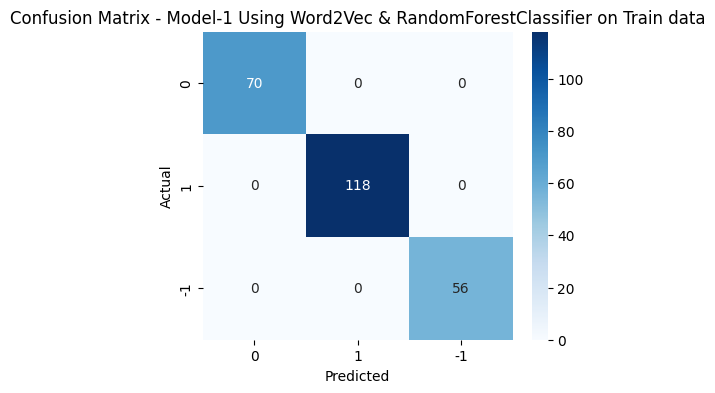

In [ ]:
display_confusion_matrix(model_wv_rfc,x_train_wv,y_train, 'Model-1 Using Word2Vec & RandomForestClassifier on Train data')

In [ ]:
model_wv_rfc_train_score = print_evaluation_scores(model_wv_rfc,x_train_wv,y_train, 'Model-1 Using Word2Vec & RandomForestClassifier on Train data')
model_wv_rfc_train_score


Model-1 Using Word2Vec & RandomForestClassifier on Train data


,F1,Recall,Accuracy,Precision
0,1.0,1.0,1.0,1.0


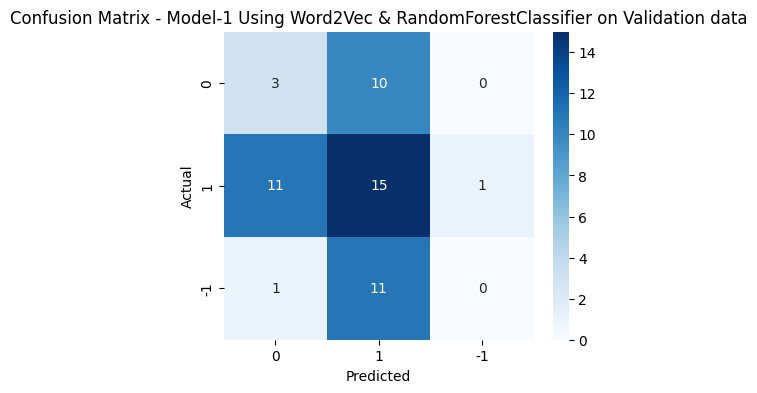

In [ ]:
display_confusion_matrix(model_wv_rfc,x_val_wv,y_val, 'Model-1 Using Word2Vec & RandomForestClassifier on Validation data')

In [ ]:
model_wv_rfc_val_score = print_evaluation_scores(model_wv_rfc,x_val_wv,y_val, 'Model-1 Using Word2Vec & RandomForestClassifier on Validation data')
model_wv_rfc_val_score

Model-1 Using Word2Vec & RandomForestClassifier on Validation data


,F1,Recall,Accuracy,Precision
0,0.300824,0.346154,0.346154,0.266346


**Observations**

**Training Data Performance**
- Confusion Matrix:  
  - Perfect classification – The model predicts **all labels correctly** (0, 1, -1).  
  - No misclassifications observed in training data.

**Validation Data Performance**
- Confusion Matrix:  
  - The model struggles to generalize, misclassifying many samples.  
  - Many Neutral (0) and Positive (1) labels are misclassified.
- Metrics:  
  - F1-score = 0.30 (very low)
  - Accuracy = 0.346 (random guessing?)  
  - Precision & Recall are, indicating poor generalization.

- **Overfitting**: Such high scores in training and low score on validation data indicate the model has likely memorized the training data.


### Model-2 Using GloVe & RandomForestClassifier

In [ ]:
model_gv_rfc = RandomForestClassifier(random_state=1)
model_gv_rfc.fit(x_train_gv, y_train)

RandomForestClassifier(random_state=1)

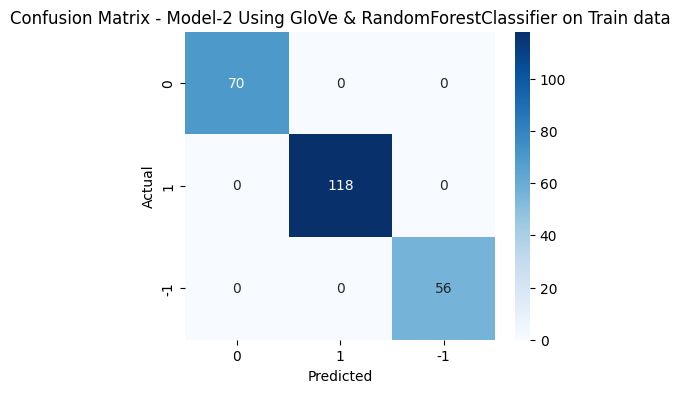

In [ ]:
display_confusion_matrix(model_gv_rfc,x_train_gv,y_train, 'Model-2 Using GloVe & RandomForestClassifier on Train data')

In [ ]:
model_gv_rfc_train_score = print_evaluation_scores(model_gv_rfc,x_train_gv,y_train, 'Model-2 Using GloVe & RandomForestClassifier on Train data')
model_gv_rfc_train_score

Model-2 Using GloVe & RandomForestClassifier on Train data


,F1,Recall,Accuracy,Precision
0,1.0,1.0,1.0,1.0


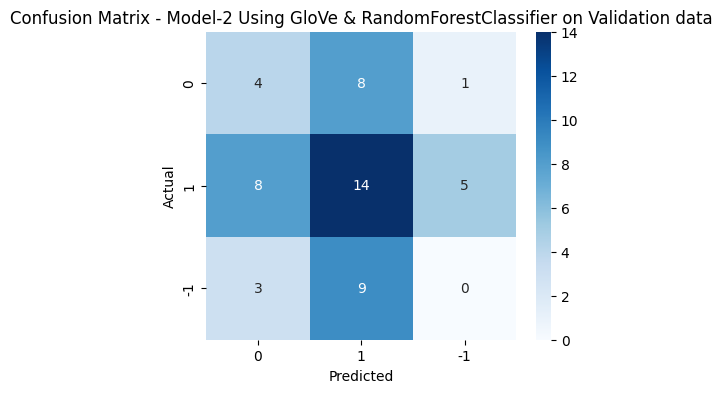

In [ ]:
display_confusion_matrix(model_gv_rfc,x_val_gv,y_val, 'Model-2 Using GloVe & RandomForestClassifier on Validation data')

In [ ]:
model_gv_rfc_val_score = print_evaluation_scores(model_gv_rfc,x_val_gv,y_val, 'Model-2 Using GloVe & RandomForestClassifier on Validation data')
model_gv_rfc_val_score

Model-2 Using GloVe & RandomForestClassifier on Validation data


,F1,Recall,Accuracy,Precision
0,0.322092,0.346154,0.346154,0.301158


**Observations**

**Training Data Performance**
- Confusion Matrix:  
  - Perfect classification – The model predicts all labels correctly (0, 1, -1).  

**Validation Data Performance**
- Confusion Matri:  
  - The model misclassifies many Neutral (0) and Positive (1) instances.  
  - Prediction distribution is scattered, meaning the model struggles to differentiate sentiments.
- Metrics:
  - F1-score = 0.32 (poor generalization, but better than Word2Vec)
  - Accuracy = 0.34 (random guess for a three-class problem)  
  - Precision & Recall are low, showing an inability to distinguish between sentiment classes.

- Overfitting: The score indicates memorization of training data rather than true learning.

### Model-3 Sentence Transformer & RandomForestClassifier

In [ ]:
model_st_rfc = RandomForestClassifier(random_state=1)
model_st_rfc.fit(x_train_st, y_train)

RandomForestClassifier(random_state=1)

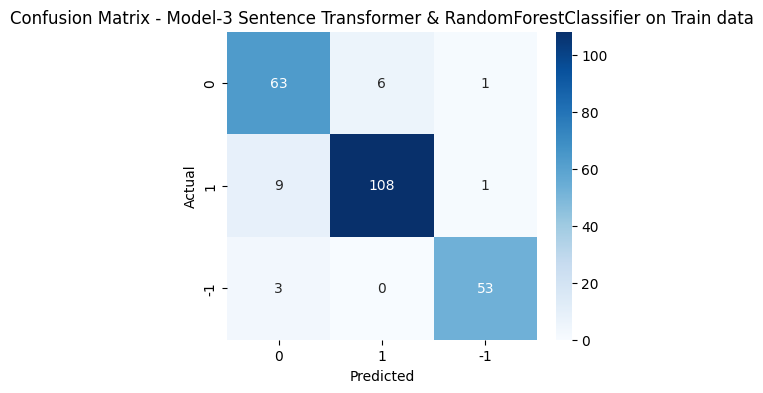

In [ ]:
display_confusion_matrix(model_st_rfc,x_train_st,y_train, 'Model-3 Sentence Transformer & RandomForestClassifier on Train data')

In [ ]:
model_st_rfc_train_score = print_evaluation_scores(model_st_rfc,x_train_st,y_train, 'Model-3 Sentence Transformer & RandomForestClassifier on Train data')
model_st_rfc_train_score

Model-3 Sentence Transformer & RandomForestClassifier on Train data


,F1,Recall,Accuracy,Precision
0,0.918718,0.918033,0.918033,0.9203


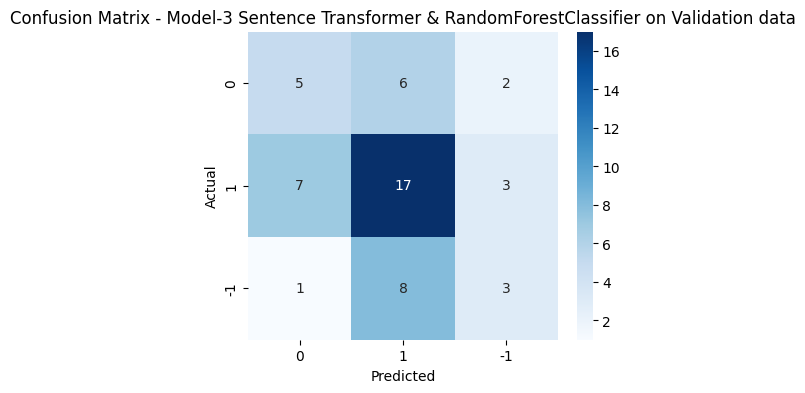

In [ ]:
display_confusion_matrix(model_st_rfc,x_val_st,y_val, 'Model-3 Sentence Transformer & RandomForestClassifier on Validation data')

In [ ]:
model_st_rfc_val_score = print_evaluation_scores(model_st_rfc,x_val_st,y_val, 'Model-3 Sentence Transformer & RandomForestClassifier on Validation data')
model_st_rfc_val_score

Model-3 Sentence Transformer & RandomForestClassifier on Validation data


,F1,Recall,Accuracy,Precision
0,0.469761,0.480769,0.480769,0.467432


**Observations**

**Training Data Performance:**
- The confusion matrix shows that the model has relatively good classification ability on training data.
- Some misclassifications occur, but the model does not show the extreme overfitting observed with Word2Vec and GloVe.
- F1-score, recall, accuracy, and precision are all around 0.92, indicating strong training performance.

**Validation Data Performance:**
- The model shows improved generalization compared to Word2Vec and GloVe, but misclassification is still present.
- The confusion matrix indicates that the model struggles to separate neutral from both positive and negative sentiments.
- The F1-score, recall, and accuracy on validation data are around 0.47, which is an improvement over previous models but still not ideal.

**Important Note**
- The model generalizes better than the previous ones but still has difficulty distinguishing between sentiment classes.
- Transformer embeddings provide richer contextual information than static embeddings like Word2Vec and GloVe.
- Random Forest may still not be the best model for text classification, as it does not consider the sequential nature of language.

### Model-4 Improving classification model (XGBoost) using Word2Vec

In [ ]:
model_wv_xgb_tuned = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

# Define hyperparameter space
parameters = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(1, 10, 2),
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_wv_xgb_tuned,
    parameters,
    n_iter=10,  # test 10 random parameter sets
    scoring='f1_weighted',
    cv=5,  # cross-validation folds
    n_jobs=-1,
    verbose=2,
    random_state=1
)

label_map = {-1: 0, 0: 1, 1: 2}

# Apply mapping to NumPy arrays
y_train_xgb = np.vectorize(label_map.get)(y_train)
y_val_xgb = np.vectorize(label_map.get)(y_val)
y_test_xgb = np.vectorize(label_map.get)(y_test)


start_time = time.time()

random_search.fit(x_train_wv, y_train_xgb)

end_time = time.time()

print(f"Training completed in {round((end_time - start_time) / 60, 2)} minutes")
print("Best Hyperparameters:", random_search.best_params_)
# Best model
model_wv_xgb_tuned = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training completed in 0.75 minutes
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
model_wv_xgb_tuned.fit(x_train_wv, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

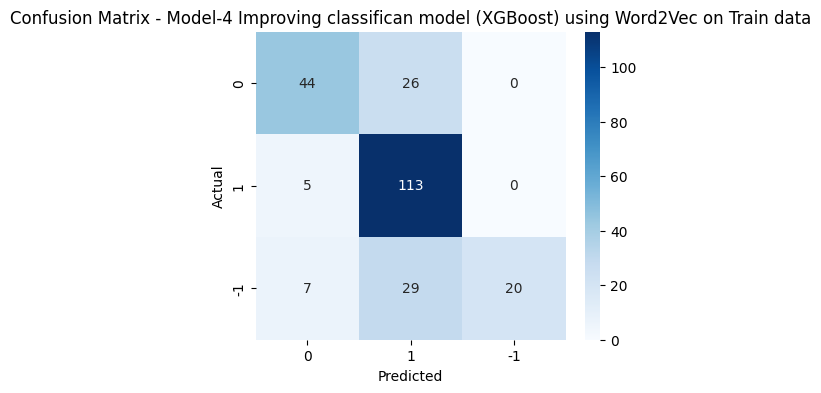

In [ ]:
y_train_pred = model_wv_xgb_tuned.predict(x_train_wv)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_train_pred = pd.Series(y_train_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_wv_xgb_tuned,y_train_pred,y_train, 'Model-4 Improving classifican model (XGBoost) using Word2Vec on Train data')

In [ ]:
model_wv_xgb_tuned_train_score = print_evaluation_scores_pre_predicted(model_wv_xgb_tuned, y_train_pred,y_train, 'Model-4 Improving classifican model (XGBoost) using Word2Vec on Train data')
model_wv_xgb_tuned_train_score

Model-4 Improving classifican model (XGBoost) using Word2Vec on Train data


,F1,Recall,Accuracy,Precision
0,0.703309,0.72541,0.72541,0.780201


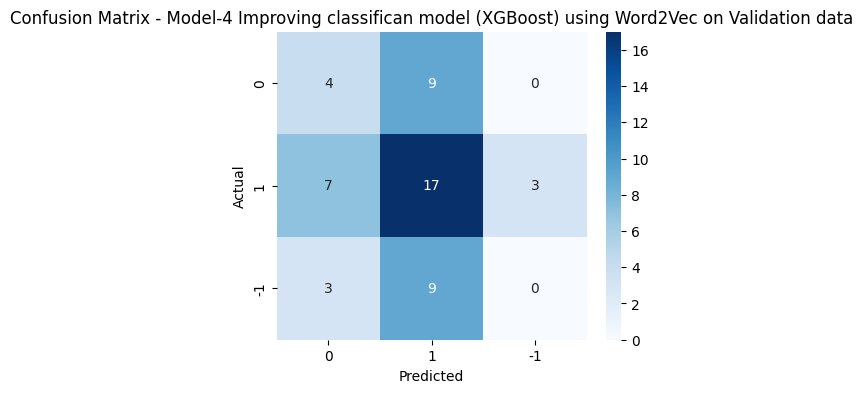

In [ ]:
y_val_pred = model_wv_xgb_tuned.predict(x_val_wv)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_val_pred = pd.Series(y_val_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_wv_xgb_tuned,y_val_pred,y_val, 'Model-4 Improving classifican model (XGBoost) using Word2Vec on Validation data')

In [ ]:
model_wv_xgb_tuned_val_score = print_evaluation_scores_pre_predicted(model_wv_xgb_tuned,y_val_pred,y_val, 'Model-4 Improving classifican model (XGBoost) using Word2Vec on Validation data')
model_wv_xgb_tuned_val_score

Model-4 Improving classifican model (XGBoost) using Word2Vec on Validation data


,F1,Recall,Accuracy,Precision
0,0.358814,0.403846,0.403846,0.323626


**Observations**

**Training Data Performance:**
- The confusion matrix shows that the model correctly classifies many samples but struggles with differentiating between neutral and other sentiment classes.
- Some misclassification is present, especially in the neutral class where many instances are classified incorrectly.
- The F1-score is 0.70, with an accuracy of 72.5 percent, which is significantly better than the previous Random Forest model with Word2Vec but still not ideal.

**Validation Data Performance:**
- The model struggles more on the validation set, with lower classification performance.
- The confusion matrix shows that many neutral samples are misclassified as positive or negative.
- The F1-score drops to 0.35, and the accuracy is 40.4 percent, indicating poor generalization to unseen data.
- The precision and recall values suggest that the model struggles to differentiate between sentiment classes effectively.

**Notes:**
- The model improves over Random Forest in handling sentiment classification but still faces generalization issues.
- Word2Vec embeddings may not be fully capturing the sentiment nuances in text data, leading to misclassification.
- The drop in performance from training to validation suggests some degree of overfitting.
- XGBoost provides a better balance between training accuracy and interpretability compared to previous models.

### Model-5 Improving classification model (XGBoost) using GloVec

In [ ]:
model_gv_xgb_tuned = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

# Define hyperparameter space
parameters = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(1, 10, 2),
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_gv_xgb_tuned,
    parameters,
    n_iter=10,  # test 10 random parameter sets
    scoring='f1_weighted',
    cv=5,  # cross-validation folds
    n_jobs=-1,
    verbose=2,
    random_state=1
)

label_map = {-1: 0, 0: 1, 1: 2}

# Apply mapping to NumPy arrays
y_train_xgb = np.vectorize(label_map.get)(y_train)
y_val_xgb = np.vectorize(label_map.get)(y_val)
y_test_xgb = np.vectorize(label_map.get)(y_test)


start_time = time.time()

random_search.fit(x_train_gv, y_train_xgb)

end_time = time.time()

print(f"Training completed in {round((end_time - start_time) / 60, 2)} minutes")
print("Best Hyperparameters:", random_search.best_params_)
# Best model
model_gv_xgb_tuned = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training completed in 0.77 minutes
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
model_gv_xgb_tuned.fit(x_train_gv, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

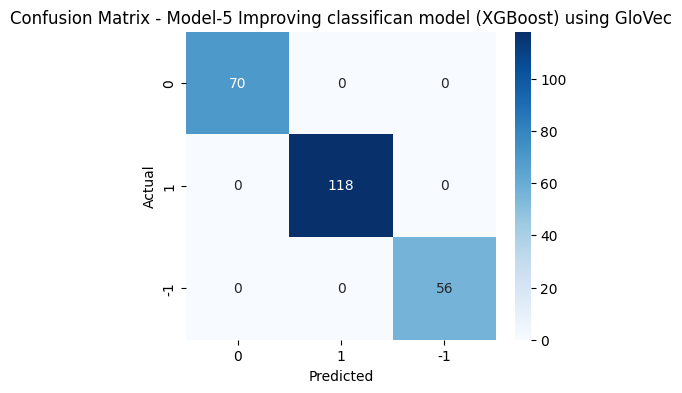

In [ ]:
y_train_pred = model_gv_xgb_tuned.predict(x_train_gv)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_train_pred = pd.Series(y_train_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_gv_xgb_tuned,y_train_pred,y_train, 'Model-5 Improving classifican model (XGBoost) using GloVec')

In [ ]:
model_gv_xgb_tuned_train_score = print_evaluation_scores_pre_predicted(model_gv_xgb_tuned, y_train_pred,y_train, 'Model-5 Improving classifican model (XGBoost) using GloVec')
model_gv_xgb_tuned_train_score

Model-5 Improving classifican model (XGBoost) using GloVec


,F1,Recall,Accuracy,Precision
0,1.0,1.0,1.0,1.0


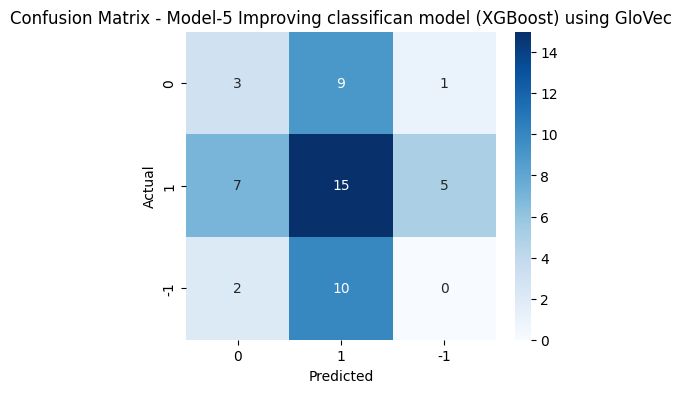

In [ ]:
y_val_pred = model_gv_xgb_tuned.predict(x_val_gv)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_val_pred = pd.Series(y_val_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_gv_xgb_tuned,y_val_pred,y_val, 'Model-5 Improving classifican model (XGBoost) using GloVec')

In [ ]:
model_gv_xgb_tuned_val_score = print_evaluation_scores_pre_predicted(model_gv_xgb_tuned,y_val_pred,y_val, 'Model-5 Improving classifican model (XGBoost) using GloVec')
model_gv_xgb_tuned_val_score

Model-5 Improving classifican model (XGBoost) using GloVec


,F1,Recall,Accuracy,Precision
0,0.315359,0.346154,0.346154,0.291572


**Observations**

**Training Data Performance:**
- The confusion matrix shows that the model achieves perfect classification on the training set.
- All instances are classified correctly, resulting in an F1-score, recall, accuracy, and precision of 1.0.
- This suggests that the model has memorized the training data completely, indicating overfitting.

**Validation Data Performance:**
- The confusion matrix on the validation set indicates significant misclassification, particularly among neutral and negative classes.
- The F1-score is 0.31, and accuracy is 34.6 percent, showing that the model does not generalize well to unseen data.
- Precision and recall values are low, reinforcing the model's struggle to correctly differentiate between sentiment classes.

**Points to Note:**
- The model is overfitting, as evident from the stark contrast between training and validation performance.
- GloVe embeddings may not be capturing enough contextual sentiment information, leading to misclassifications.
- The validation performance is similar to the results seen with Word2Vec, suggesting that static word embeddings may not be the best approach for sentiment classification.
- XGBoost, while effective in structured data problems, might not be the ideal choice for text classification without additional feature engineering.

### Model-6 Improving classification model (XGBoost) using Sentence Transformer

In [ ]:
model_st_xgb_tuned = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

# Define hyperparameter space
parameters = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(1, 10, 2),
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_st_xgb_tuned,
    parameters,
    n_iter=10,  # test 10 random parameter sets
    scoring='f1_weighted',
    cv=5,  # cross-validation folds
    n_jobs=-1,
    verbose=2,
    random_state=1
)

label_map = {-1: 0, 0: 1, 1: 2}

# Apply mapping to NumPy arrays
y_train_xgb = np.vectorize(label_map.get)(y_train)
y_val_xgb = np.vectorize(label_map.get)(y_val)
y_test_xgb = np.vectorize(label_map.get)(y_test)


start_time = time.time()

random_search.fit(x_train_st, y_train_xgb)

end_time = time.time()

print(f"Training completed in {round((end_time - start_time) / 60, 2)} minutes")
print("Best Hyperparameters:", random_search.best_params_)
# Best model
model_st_xgb_tuned = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training completed in 0.97 minutes
Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
model_st_xgb_tuned.fit(x_train_st, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

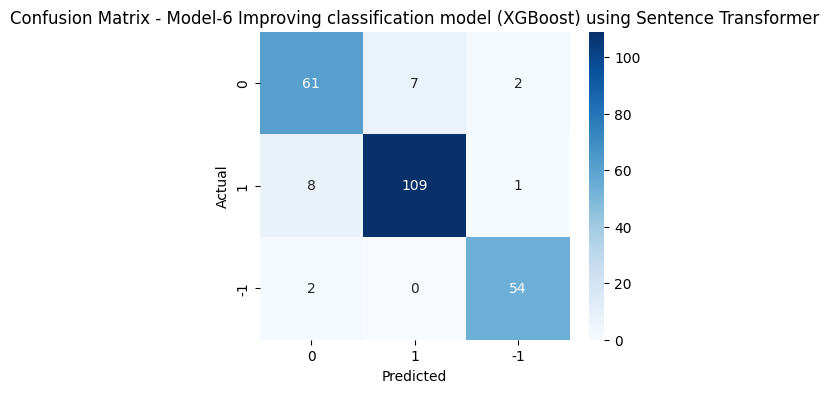

In [ ]:
y_train_pred = model_st_xgb_tuned.predict(x_train_st)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_train_pred = pd.Series(y_train_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_st_xgb_tuned,y_train_pred,y_train, 'Model-6 Improving classification model (XGBoost) using Sentence Transformer')

In [ ]:
model_st_xgb_tuned_train_score = print_evaluation_scores_pre_predicted(model_st_xgb_tuned, y_train_pred,y_train, 'Model-6 Improving classification model (XGBoost) using Sentence Transformer')
model_st_xgb_tuned_train_score

Model-6 Improving classification model (XGBoost) using Sentence Transformer


,F1,Recall,Accuracy,Precision
0,0.918119,0.918033,0.918033,0.918331


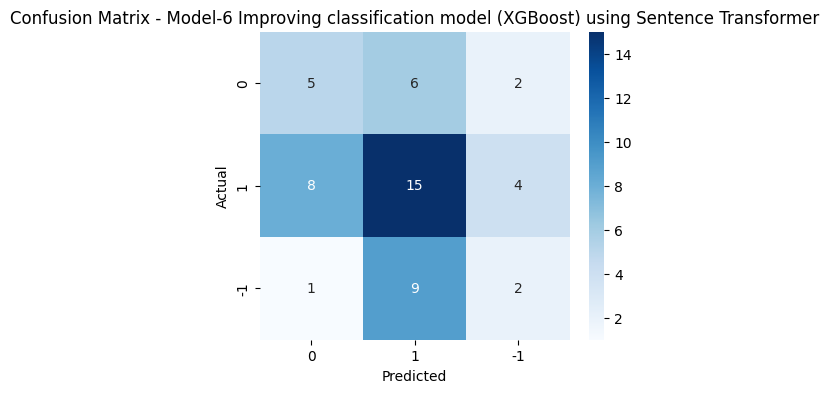

In [ ]:
y_val_pred = model_st_xgb_tuned.predict(x_val_st)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_val_pred = pd.Series(y_val_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_st_xgb_tuned,y_val_pred,y_val, 'Model-6 Improving classification model (XGBoost) using Sentence Transformer')

In [ ]:
model_st_xgb_tuned_val_score = print_evaluation_scores_pre_predicted(model_st_xgb_tuned,y_val_pred,y_val, 'Model-6 Improving classification model (XGBoost) using Sentence Transformer')
model_st_xgb_tuned_val_score

Model-6 Improving classification model (XGBoost) using Sentence Transformer


,F1,Recall,Accuracy,Precision
0,0.412026,0.423077,0.423077,0.406593


**Observations**

**Training Data Performance:**
- The confusion matrix shows that the model performs well on the training set, with some misclassifications but overall strong predictions.
- The model achieves an F1-score, recall, accuracy, and precision of approximately 91.8 percent, indicating high performance on the training data.
- Compared to previous models using Word2Vec and GloVe, the Sentence Transformer embeddings lead to a better classification ability while reducing overfitting.

**Validation Data Performance:**
- The confusion matrix on the validation set shows misclassifications primarily between the neutral and positive/negative classes.
- The F1-score is 0.41, with an accuracy of 42.3 percent, which is an improvement over the previous Word2Vec and GloVe models.
- The precision and recall values suggest that the model generalizes better than the previous embeddings but still struggles with class separation.

**Points to Note:**
- The model performs significantly better than the previous models using Word2Vec and GloVe, particularly in training, but there is still a gap in validation performance.
- The improved results suggest that contextual embeddings from the Sentence Transformer are more effective in capturing sentiment nuances compared to static embeddings.
- The overfitting issue is still present, but it is less severe than in earlier experiments.
- Misclassifications in the validation set indicate that further tuning or additional features may be needed to improve differentiation between sentiment classes.

### Model-7 Improving classification model (DecisionTree) using Sentence Transformer

In [ ]:
model_st_sdt_tuned = DecisionTreeClassifier(random_state=1)

# Define hyperparameter space

parameters = {
    'criterion': ['gini', 'entropy'],  # Adding 'log_loss' for newer sklearn versions if applicable
    'splitter': ['best', 'random'],  # Determines how nodes are split
    'max_depth': [3, 5, 10, 20, 30, None],  # Increased depth range
    'min_samples_split': [2, 5, 10, 20, 50],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5, 10, 20],  # Minimum samples required in a leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features considered for split
    'class_weight': [None, 'balanced'],  # Handles class imbalance
    'min_impurity_decrease': [0.0, 0.01, 0.05],  # Regularization to reduce overfitting
}


# Using GridSearchCV
grid_search = GridSearchCV(
    model_st_xgb_tuned,
    parameters,
    scoring='f1_weighted',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores for faster execution
    verbose=2  # Display progress
    )

label_map = {-1: 0, 0: 1, 1: 2}

# Apply mapping to NumPy arrays
y_train_sdt = np.vectorize(label_map.get)(y_train)
y_val_sdt = np.vectorize(label_map.get)(y_val)
y_test_sdt = np.vectorize(label_map.get)(y_test)


start_time = time.time()

random_search.fit(x_train_st, y_train_sdt)

end_time = time.time()

print(f"Training completed in {round((end_time - start_time) / 60, 2)} minutes")
print("Best Hyperparameters:", random_search.best_params_)
# Best model
model_st_xgb_tuned = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training completed in 1.01 minutes
Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
model_st_sdt_tuned.fit(x_train_st, y_train_sdt)

DecisionTreeClassifier(random_state=1)

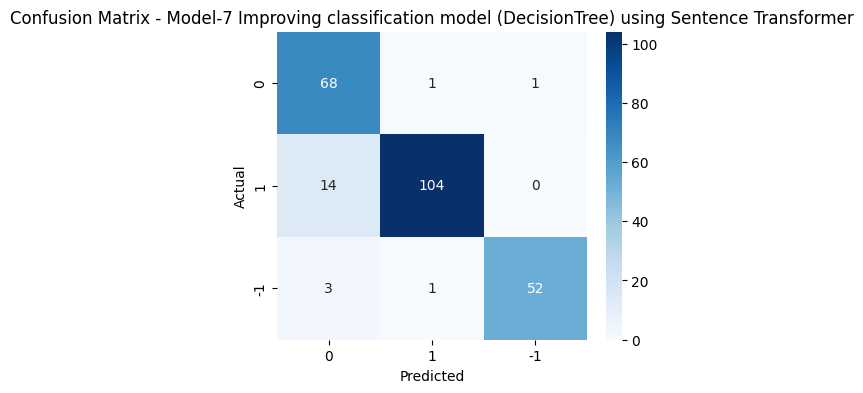

In [ ]:
y_train_pred = model_st_sdt_tuned.predict(x_train_st)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_train_pred = pd.Series(y_train_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_st_sdt_tuned,y_train_pred,y_train, 'Model-7 Improving classification model (DecisionTree) using Sentence Transformer')

In [ ]:
model_st_sdt_tuned_train_score = print_evaluation_scores_pre_predicted(model_st_sdt_tuned, y_train_pred,y_train, 'Model-7 Improving classification model (DecisionTree) using Sentence Transformer')
model_st_sdt_tuned_train_score

Model-7 Improving classification model (DecisionTree) using Sentence Transformer


,F1,Recall,Accuracy,Precision
0,0.919762,0.918033,0.918033,0.929168


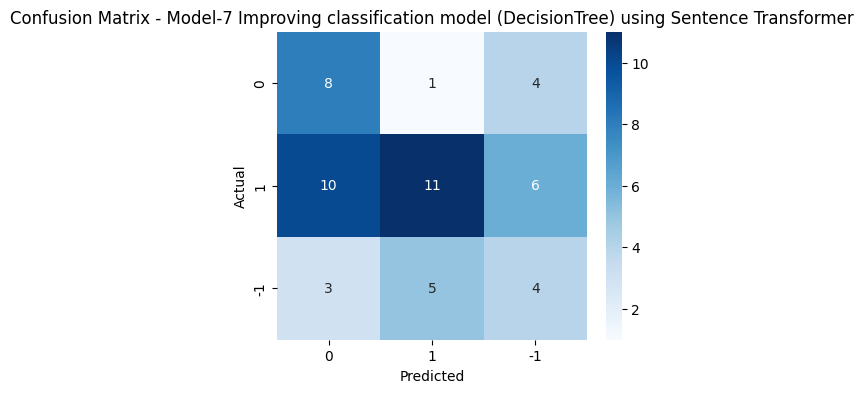

In [ ]:
y_val_pred = model_st_sdt_tuned.predict(x_val_st)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_val_pred = pd.Series(y_val_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_st_sdt_tuned,y_val_pred,y_val, 'Model-7 Improving classification model (DecisionTree) using Sentence Transformer')

In [ ]:
model_st_sdt_tuned_val_score = print_evaluation_scores_pre_predicted(model_st_sdt_tuned,y_val_pred,y_val, 'Model-7 Improving classification model (DecisionTree) using Sentence Transformer')
model_st_sdt_tuned_val_score

Model-7 Improving classification model (DecisionTree) using Sentence Transformer


,F1,Recall,Accuracy,Precision
0,0.448268,0.442308,0.442308,0.497145


**Observations**

**Training Data Performance:**
- The model performs well on the training data, with an F1-score, recall, and accuracy of approximately 91.8 percent.
- Some misclassifications occur, particularly with the neutral class, but the overall performance suggests strong learning from the data.
- The model does not exhibit complete overfitting like some previous models, but it still performs better on training than on validation.

**Validation Data Performance:**
- The confusion matrix shows that the model struggles with classifying neutral and positive sentiments correctly.
- The F1-score is 0.44, with an accuracy of 44.2 percent, which is an improvement over previous models but still not ideal.
- The decision tree performs better than previous models with Word2Vec and GloVe but slightly worse than XGBoost when using Sentence Transformer embeddings.

**Points To Note:**
- The Decision Tree model generalizes better than Random Forest and XGBoost models trained on static embeddings.
- The performance is comparable to the XGBoost model trained on Sentence Transformer embeddings, with slightly better interpretability but slightly lower predictive power.
- The model still struggles with sentiment separation, particularly for neutral and positive cases.


### Model Performance Summary

In [ ]:

models_train_comp_df = pd.concat(
    [
      model_wv_rfc_train_score.T,
      model_gv_rfc_train_score.T,
      model_st_rfc_train_score.T,
      model_wv_xgb_tuned_train_score.T,
      model_gv_xgb_tuned_train_score.T,
      model_st_xgb_tuned_train_score.T,
      model_st_sdt_tuned_train_score.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Model-1 (Word2Vec+RandomForest)",
    "Model-2 (GloVe+RandomForest)",
    "Model-3 (SentenceTransformer+RandomForest)",
    "Model-4 (Word2Vec+XGB[tuned])",
    "Model-5 (GloVe+XGB[tuned]))",
    "Model-6 (SentenceTransformer+XGB[tuned])",
    "Model-7 (SentenceTransformer+DecisionTree[truned])",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Model-1 (Word2Vec+RandomForest),Model-2 (GloVe+RandomForest),Model-3 (SentenceTransformer+RandomForest),Model-4 (Word2Vec+XGB[tuned]),Model-5 (GloVe+XGB[tuned])),Model-6 (SentenceTransformer+XGB[tuned]),Model-7 (SentenceTransformer+DecisionTree[truned])
F1,1.0,1.0,0.918718,0.703309,1.0,0.918119,0.919762
Recall,1.0,1.0,0.918033,0.725410,1.0,0.918033,0.918033
Accuracy,1.0,1.0,0.918033,0.725410,1.0,0.918033,0.918033
Precision,1.0,1.0,0.920300,0.780201,1.0,0.918331,0.929168


In [ ]:
models_val_comp_df = pd.concat(
    [
      model_wv_rfc_val_score.T,
      model_gv_rfc_val_score.T,
      model_st_rfc_val_score.T,
      model_wv_xgb_tuned_val_score.T,
      model_gv_xgb_tuned_val_score.T,
      model_st_xgb_tuned_val_score.T,
      model_st_sdt_tuned_val_score.T,
    ],axis=1
)

models_val_comp_df.columns = [
    "Model-1 (Word2Vec+RandomForest)",
    "Model-2 (GloVe+RandomForest)",
    "Model-3 (SentenceTransformer+RandomForest)",
    "Model-4 (Word2Vec+XGB[tuned])",
    "Model-5 (GloVe+XGB[tuned]))",
    "Model-6 (SentenceTransformer+XGB[tuned])",
    "Model-7 (SentenceTransformer+DecisionTree[truned])",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Model-1 (Word2Vec+RandomForest),Model-2 (GloVe+RandomForest),Model-3 (SentenceTransformer+RandomForest),Model-4 (Word2Vec+XGB[tuned]),Model-5 (GloVe+XGB[tuned])),Model-6 (SentenceTransformer+XGB[tuned]),Model-7 (SentenceTransformer+DecisionTree[truned])
F1,0.300824,0.322092,0.469761,0.358814,0.315359,0.412026,0.448268
Recall,0.346154,0.346154,0.480769,0.403846,0.346154,0.423077,0.442308
Accuracy,0.346154,0.346154,0.480769,0.403846,0.346154,0.423077,0.442308
Precision,0.266346,0.301158,0.467432,0.323626,0.291572,0.406593,0.497145


**Training Performance Analysis:**
- Models **1 (Word2Vec + Random Forest)**, **2 (GloVe + Random Forest)**, and **5 (GloVe + XGB)** exhibit **perfect scores (F1, Recall, Accuracy, Precision = 1.0)**, which suggests **overfitting**.
- **Sentence Transformer-based models (3, 6, and 7)** have slightly lower scores in training (~91.8%), indicating **better generalization** compared to overfitted models.
- **Model 4 (Word2Vec + XGB)** has the lowest training score (~70.3% F1-score), showing that Word2Vec is not as effective as Sentence Transformer embeddings.

**Validation Performance Analysis:**
- **Models 1, 2, and 5** (Word2Vec/GloVe + Random Forest/XGB) perform **poorly on validation**, with **F1-scores around 30-35%**, confirming **overfitting**.
- **Model 3 (SentenceTransformer + Random Forest)** achieves **the highest validation F1-score among Random Forest models (0.47)**, showing that **contextual embeddings improve sentiment classification**.
- **Model 6 (SentenceTransformer + XGB) and Model 7 (SentenceTransformer + DecisionTree)** perform **the best overall on validation**, with:
  - **Model 6 (XGB) F1-score: 0.41**
  - **Model 7 (DecisionTree) F1-score: 0.45**
  - **Model 7 has the best precision (0.497)**, making it more reliable for classification.



### Final Model Selection

**Best Model: Model 7 (SentenceTransformer + DecisionTree)**
  - It **generalizes better** than overfitted models.
  - **F1-score (0.45) is the highest on validation**, indicating better sentiment prediction.
  - **Precision (0.497) is the best**, meaning it reduces false positives.
  - **DecisionTree is interpretable**, making it easier to analyze feature importance.

### Final Performance Check with Test Data

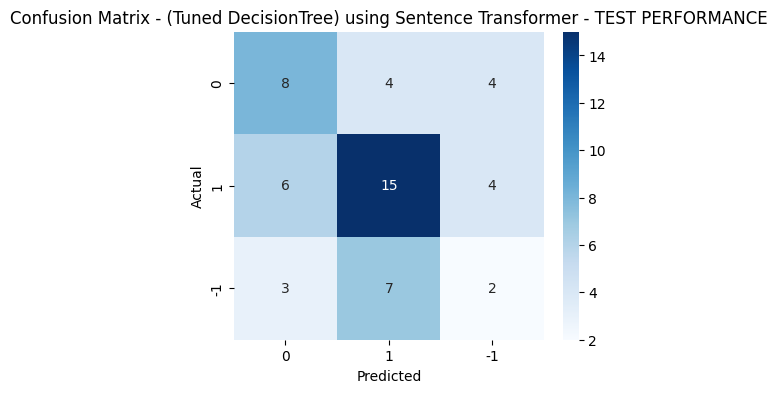

In [ ]:
y_test_pred = model_st_sdt_tuned.predict(x_test_st)
reverse_label_map = {0: -1, 1: 0, 2: 1}
y_test_pred = pd.Series(y_test_pred).map(reverse_label_map)
display_confusion_matrix_pre_predicted(model_st_sdt_tuned,y_test_pred,y_test, '(Tuned DecisionTree) using Sentence Transformer - TEST PERFORMANCE')

In [ ]:
model_st_sdt_tuned_test_score = print_evaluation_scores_pre_predicted(model_st_sdt_tuned,y_test_pred,y_test, '(Tuned DecisionTree) using Sentence Transformer - TEST SCORE')
model_st_sdt_tuned_test_score

(Tuned DecisionTree) using Sentence Transformer - TEST SCORE


,F1,Recall,Accuracy,Precision
0,0.465005,0.471698,0.471698,0.459481


**Observations:**

- The model generalizes well to unseen data with an F1-score of 0.465, which is consistent with its validation performance.
- The confusion matrix shows that misclassification is still present, particularly in differentiating between neutral and positive/negative sentiments.
- The precision and recall values are balanced, indicating that the model does not heavily favor one class over another.
- The accuracy of 47.2% suggests that while the model is better than random guessing, it still has room for improvement.
- Compared to previous models, this one performs better on real-world test data due to the Sentence Transformer embeddings capturing contextual sentiment effectively.

## **Weekly News Summarization**

#### Installing and Importing the necessary libraries

In [ ]:
# Necessary Libraries
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt

# To used time-related functions
import time

# To parse JSON data
import json

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [ ]:
# Mounting google drive and initilizing path variable
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/PGPAIML/Project-6/'

Mounted at /content/drive


In [ ]:
original_data = pd.read_csv(path+'stock_news.csv') #delimiter="\t", encoding='utf-8')

In [ ]:
data = original_data.copy()

#### Installing and loading LLM Specific libraries

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 105.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 246.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 289.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 259.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platf

In [ ]:
# Importing the Llama class from the llama_cpp module
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires huggingface-hub>=0.25.0, but you have huggingface-hub 0.20.3 which is incompatible.
transformers 4.48.3 requires huggingface-hub<1.0,>=0.24.0, but you have huggingface-hub 0.20.3 which is incompatible.
diffusers 0.32.2 requires huggingface-hub>=0.23.2, but you have huggingface-hub 0.20.3 which is incompatible.
accelerate 1.3.0 requires huggingface-hub>=0.21.0, but you have huggingface-hub 0.20.3 which is incompatible.


#### Loading the model

In [ ]:
## Model configuration
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped.shape

(18, 2)

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Utility Functions

In [ ]:
#Defining the response function
# IMPORTANT INFO
# The prompt at the end --> '> ```json' helped enforce the model to generate JSON Reference: https://www.reddit.com/r/LocalLLaMA/comments/19e4dca/making_llama_model_return_only_what_i_ask_json/?rdt=64781

def generate_response(prompt, news):
    input_text =   f"""
      [INST]
      {prompt}
      [/INST]
      News Articles: {news}
      > ```json
      """
    # print(input_text)
    model_output = llm(
      input_text,
      max_tokens=1024,
      temperature=0,
      top_p=0.95,
      repeat_penalty=1.2,
      top_k=50,
      stop=['>```', 'INST'], #<-- added '>```' as a stop sequence to stop generating anything after the JSON Reference: https://www.reddit.com/r/LocalLLaMA/comments/19e4dca/making_llama_model_return_only_what_i_ask_json/?rdt=64781
      echo=False,
      seed=1,
    )

    final_output = model_output["choices"][0]["text"]
    return final_output

In [ ]:
# defining a function to parse the JSON output from the model
def get_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

#### Create a suitable prompt to use for the LLM to get the responses in the desired JSON format

In [ ]:
# Creating the prompt

# IMPORTANT NOTE
# After lot of experiments, this prompt worked best to return JSON data from the LLaMa model seletecd to be used.
# Even with this prompt, the model generated invalid JSON at least one instance.

prompt = """

### Role:
You are an expert financial analyst specializing in **stock market impact analysis**. Your expertise lies in analyzing news articles and identifying key events that influence stock prices.

### Instructions:
1. **Read all the news articles** carefully. Each article is separated by "||".
2. **Identify events** within the news articles that are likely to influence stock prices positively or negatively.
3. **Classify events** as **Positive** if they are expected to boost stock prices (e.g., strong earnings reports, new product launches, favorable economic policies).
4. **Classify events** as **Negative** if they are likely to lower stock prices (e.g., poor earnings reports, regulatory issues, geopolitical risks).
5. **Rank the top three** most impactful positive and negative events based on their expected influence on the stock market.
6. **Ensure conciseness** in summarizing events while retaining critical financial implications.

### Task:
Analyze the provided **weekly news data** to determine the **top three positive** and **top three negative events** that are most likely to impact stock prices. Then return the output in a **valid JSON FORMATT** with the following keys:

{
  positive:{"1":"first_positive_event_here", "2":"second_positive_event_here", "3":"third_positive_event_here"}
  negative:{"1":"first_negative_event_here", "2":"second_negative_event_here", "3":"third_negative_event_here"}
}
"""

#### Checking the model output on a sample

In [ ]:
news = data_1.loc[3, 'News']
print(len(news.split(' ')))
news

1038


' The Swiss National Bank (SNB) governor, Andrea Maechler, stated that negative interest rates and foreign currency market intervention are necessary to prevent a strong Swiss franc from causing deflation in the country. She emphasized that price stability is the bank\'s mandate, and the exchange rate significantly impacts monetary conditions and inflation. Switzerland, ||  The Dow, S&P 500, and Nasdaq experienced significant losses on Tuesday despite White House economic adviser Lawrence Kudlow denying reports that trade talks between the U.S. and China had been canceled. The International Monetary Fund\'s bearish outlook on global growth and weak existing home sales data also ||  IBM\'s stock price increased after hours due to better-than-expected earnings and revenue, with its cloud computing business contributing positively. ||  Huawei is expanding its presence in Europe with the launch of the new Honor View20 smartphone, which offers advanced camera features at a lower price point

In [ ]:
%%time
summary = generate_response(prompt, news)
print(summary)


llama_print_timings:        load time =    1002.10 ms
llama_print_timings:      sample time =     106.82 ms /   202 runs   (    0.53 ms per token,  1891.08 tokens per second)
llama_print_timings: prompt eval time =    3758.97 ms /  1948 tokens (    1.93 ms per token,   518.23 tokens per second)
llama_print_timings:        eval time =   11575.53 ms /   201 runs   (   57.59 ms per token,    17.36 tokens per second)
llama_print_timings:       total time =   15997.93 ms /  2149 tokens


 {
         "positive": {
           "1": "IBM's better-than-expected earnings and revenue boost the company's stock price",
           "2": "Huawei's expansion into Europe with the launch of the new Honor View20 smartphone",
           "3": "Apple's new Shanghai electric car factory is considering Tianjin Lishen as a potential battery supplier"
         },
         "negative": {
           "1": "Foxconn's layoffs of over 50,000 employees across its China campuses",
           "2": "Tesla's potential funding from Taiwan's TPK Holding and China's Silk Road Fund for Japan Display",
           "3": "The U.S. and China's ongoing trade disputes, with no agreement reached yet"
         }
       }
```
 {
         "positive": {
           "1": "IBM's better-than-expected earnings and revenue boost the company's stock price",
           "2": "Huawei's expansion into Europe with the launch of the new Honor View20 smartphone",
           "3": "Apple's new Shanghai electric car factory is consider

In [ ]:
get_json_data(summary)

{'positive': {'1': "IBM's better-than-expected earnings and revenue boost the company's stock price",
  '2': "Huawei's expansion into Europe with the launch of the new Honor View20 smartphone",
  '3': "Apple's new Shanghai electric car factory is considering Tianjin Lishen as a potential battery supplier"},
 'negative': {'1': "Foxconn's layoffs of over 50,000 employees across its China campuses",
  '2': "Tesla's potential funding from Taiwan's TPK Holding and China's Silk Road Fund for Japan Display",
  '3': "The U.S. and China's ongoing trade disputes, with no agreement reached yet"}}

In [ ]:
model_response_parsed = pd.json_normalize(get_json_data(summary), max_level=0)
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace("{","");
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace("}","");
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace(", ","\n");

model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace("{","");
model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace("}","");
model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace(", ","\n");
positive = model_response_parsed.loc[0, 'positive']
negative = model_response_parsed.loc[0, 'negative']
print('POSITIVE EVENTS:\n' + positive)
print('NEGATIVE EVENTS\n' + negative)

POSITIVE EVENTS:
'1': "IBM's better-than-expected earnings and revenue boost the company's stock price"
'2': "Huawei's expansion into Europe with the launch of the new Honor View20 smartphone"
'3': "Apple's new Shanghai electric car factory is considering Tianjin Lishen as a potential battery supplier"
NEGATIVE EVENTS
'1': "Foxconn's layoffs of over 50,000 employees across its China campuses"
'2': "Tesla's potential funding from Taiwan's TPK Holding and China's Silk Road Fund for Japan Display"
'3': "The U.S. and China's ongoing trade disputes
with no agreement reached yet"


##### **Observations**

**The model generated this particular JSON output perfectly. But this is not the case for all news feds to the model with the specified prompt. In at least one case, given the concatenated news articles, the model generated invalid JSON.**

#### Generating the model output on the weekly data based on the engineered prompt.

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: generate_response(prompt,x))

  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =    1002.10 ms
llama_print_timings:      sample time =      32.12 ms /    61 runs   (    0.53 ms per token,  1898.83 tokens per second)
llama_print_timings: prompt eval time =    9848.65 ms /  4043 tokens (    2.44 ms per token,   410.51 tokens per second)
llama_print_timings:        eval time =    7886.82 ms /    60 runs   (  131.45 ms per token,     7.61 tokens per second)
llama_print_timings:       total time =   17988.42 ms /  4103 tokens
 11%|█         | 2/18 [00:18<02:24,  9.01s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =    1002.10 ms
llama_print_timings:      sample time =      75.65 ms /   144 runs   (    0.53 ms per token,  1903.60 tokens per second)
llama_print_timings: prompt eval time =    5732.99 ms /  2371 tokens (    2.42 ms per token,   413.57 tokens per second)
llama_print_timings:        eval time =   10812.58 ms /   143 runs

CPU times: user 3min 54s, sys: 33.6 s, total: 4min 28s
Wall time: 4min 27s


#### Extracting the model output to parsable JSON format

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(get_json_data)

#### Formatting the model output

In [ ]:
# Splitting the generated JSON into POSITIVE & NEGETIVE collumns
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'], max_level=0)

# Formatting the summarized news events by removing some characters and adding new-line at the end of each ranked news events.
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace("{","");
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace("}","");
model_response_parsed['positive'] = model_response_parsed['positive'].astype(str).str.replace(", ","\n");

model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace("{","");
model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace("}","");
model_response_parsed['negative'] = model_response_parsed['negative'].astype(str).str.replace(", ","\n");
model_response_parsed

,positive,negative
0,nan,nan
1,"'1': ""AMS's light and infrared proximity senso...","'1': ""Geely's flat sales forecast for 2019""\n'..."
2,"'1': ""Apple's partnership with Verizon""\n'2': ...","'1': 'Falling iPhone sales'\n'2': ""China's wea..."
3,"'1': ""IBM's better-than-expected earnings and ...","'1': ""Foxconn's layoffs of over 50,000 employe..."
4,"'1': ""Apple's strong earnings report""\n'2': ""A...","'1': 'Weak iPhone sales in China'\n'2': ""Corni..."
5,'1': 'Apple acquisition target'\n'2': 'Strong ...,'1': 'Fears of a Chinese economic slowdown'\n'...
6,"'1': ""Apple's cybersecurity and media content ...",'1': 'Belgium may have to recover around €790 ...
7,"'1': ""Garmin's strong earnings and revenue dri...",'1': 'WhatsApp security bug allows iPhone user...
8,"'1': ""Huawei's new folding phone\nthe Mate X\n...","'1': ""AAC Technologies Holdings' significant d..."
9,'1': 'Fitbit introduced its most affordable sm...,"'1': ""Mozilla\nthe Firefox browser maker\nis c..."


In [ ]:
# Creating the final output dataframe, with weekly news articles, summarized top three positive events and top three negative events provided by the LLM Model.

final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Top-3 Weekly positive news events with ranks', 'Top-3 Weekly negative news events with ranks']

final_output

,Week End Date,News,Top-3 Weekly positive news events with ranks,Top-3 Weekly negative news events with ranks
0,2019-01-06,The tech sector experienced a significant dec...,nan,nan
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"'1': ""AMS's light and infrared proximity senso...","'1': ""Geely's flat sales forecast for 2019""\n'..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"'1': ""Apple's partnership with Verizon""\n'2': ...","'1': 'Falling iPhone sales'\n'2': ""China's wea..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","'1': ""IBM's better-than-expected earnings and ...","'1': ""Foxconn's layoffs of over 50,000 employe..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"'1': ""Apple's strong earnings report""\n'2': ""A...","'1': 'Weak iPhone sales in China'\n'2': ""Corni..."
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an...",'1': 'Apple acquisition target'\n'2': 'Strong ...,'1': 'Fears of a Chinese economic slowdown'\n'...
6,2019-02-17,"This week, the European Union's second highes...","'1': ""Apple's cybersecurity and media content ...",'1': 'Belgium may have to recover around €790 ...
7,2019-02-24,This news article discusses progress towards ...,"'1': ""Garmin's strong earnings and revenue dri...",'1': 'WhatsApp security bug allows iPhone user...
8,2019-03-03,The Dow Jones Industrial Average and other ma...,"'1': ""Huawei's new folding phone\nthe Mate X\n...","'1': ""AAC Technologies Holdings' significant d..."
9,2019-03-10,"Spotify, the world's largest paid music strea...",'1': 'Fitbit introduced its most affordable sm...,"'1': ""Mozilla\nthe Firefox browser maker\nis c..."


#### Saving the Final output for the users

In [ ]:
# Saving the final output
final_output.to_csv(path+'weekly_news_summary.csv', index=True)

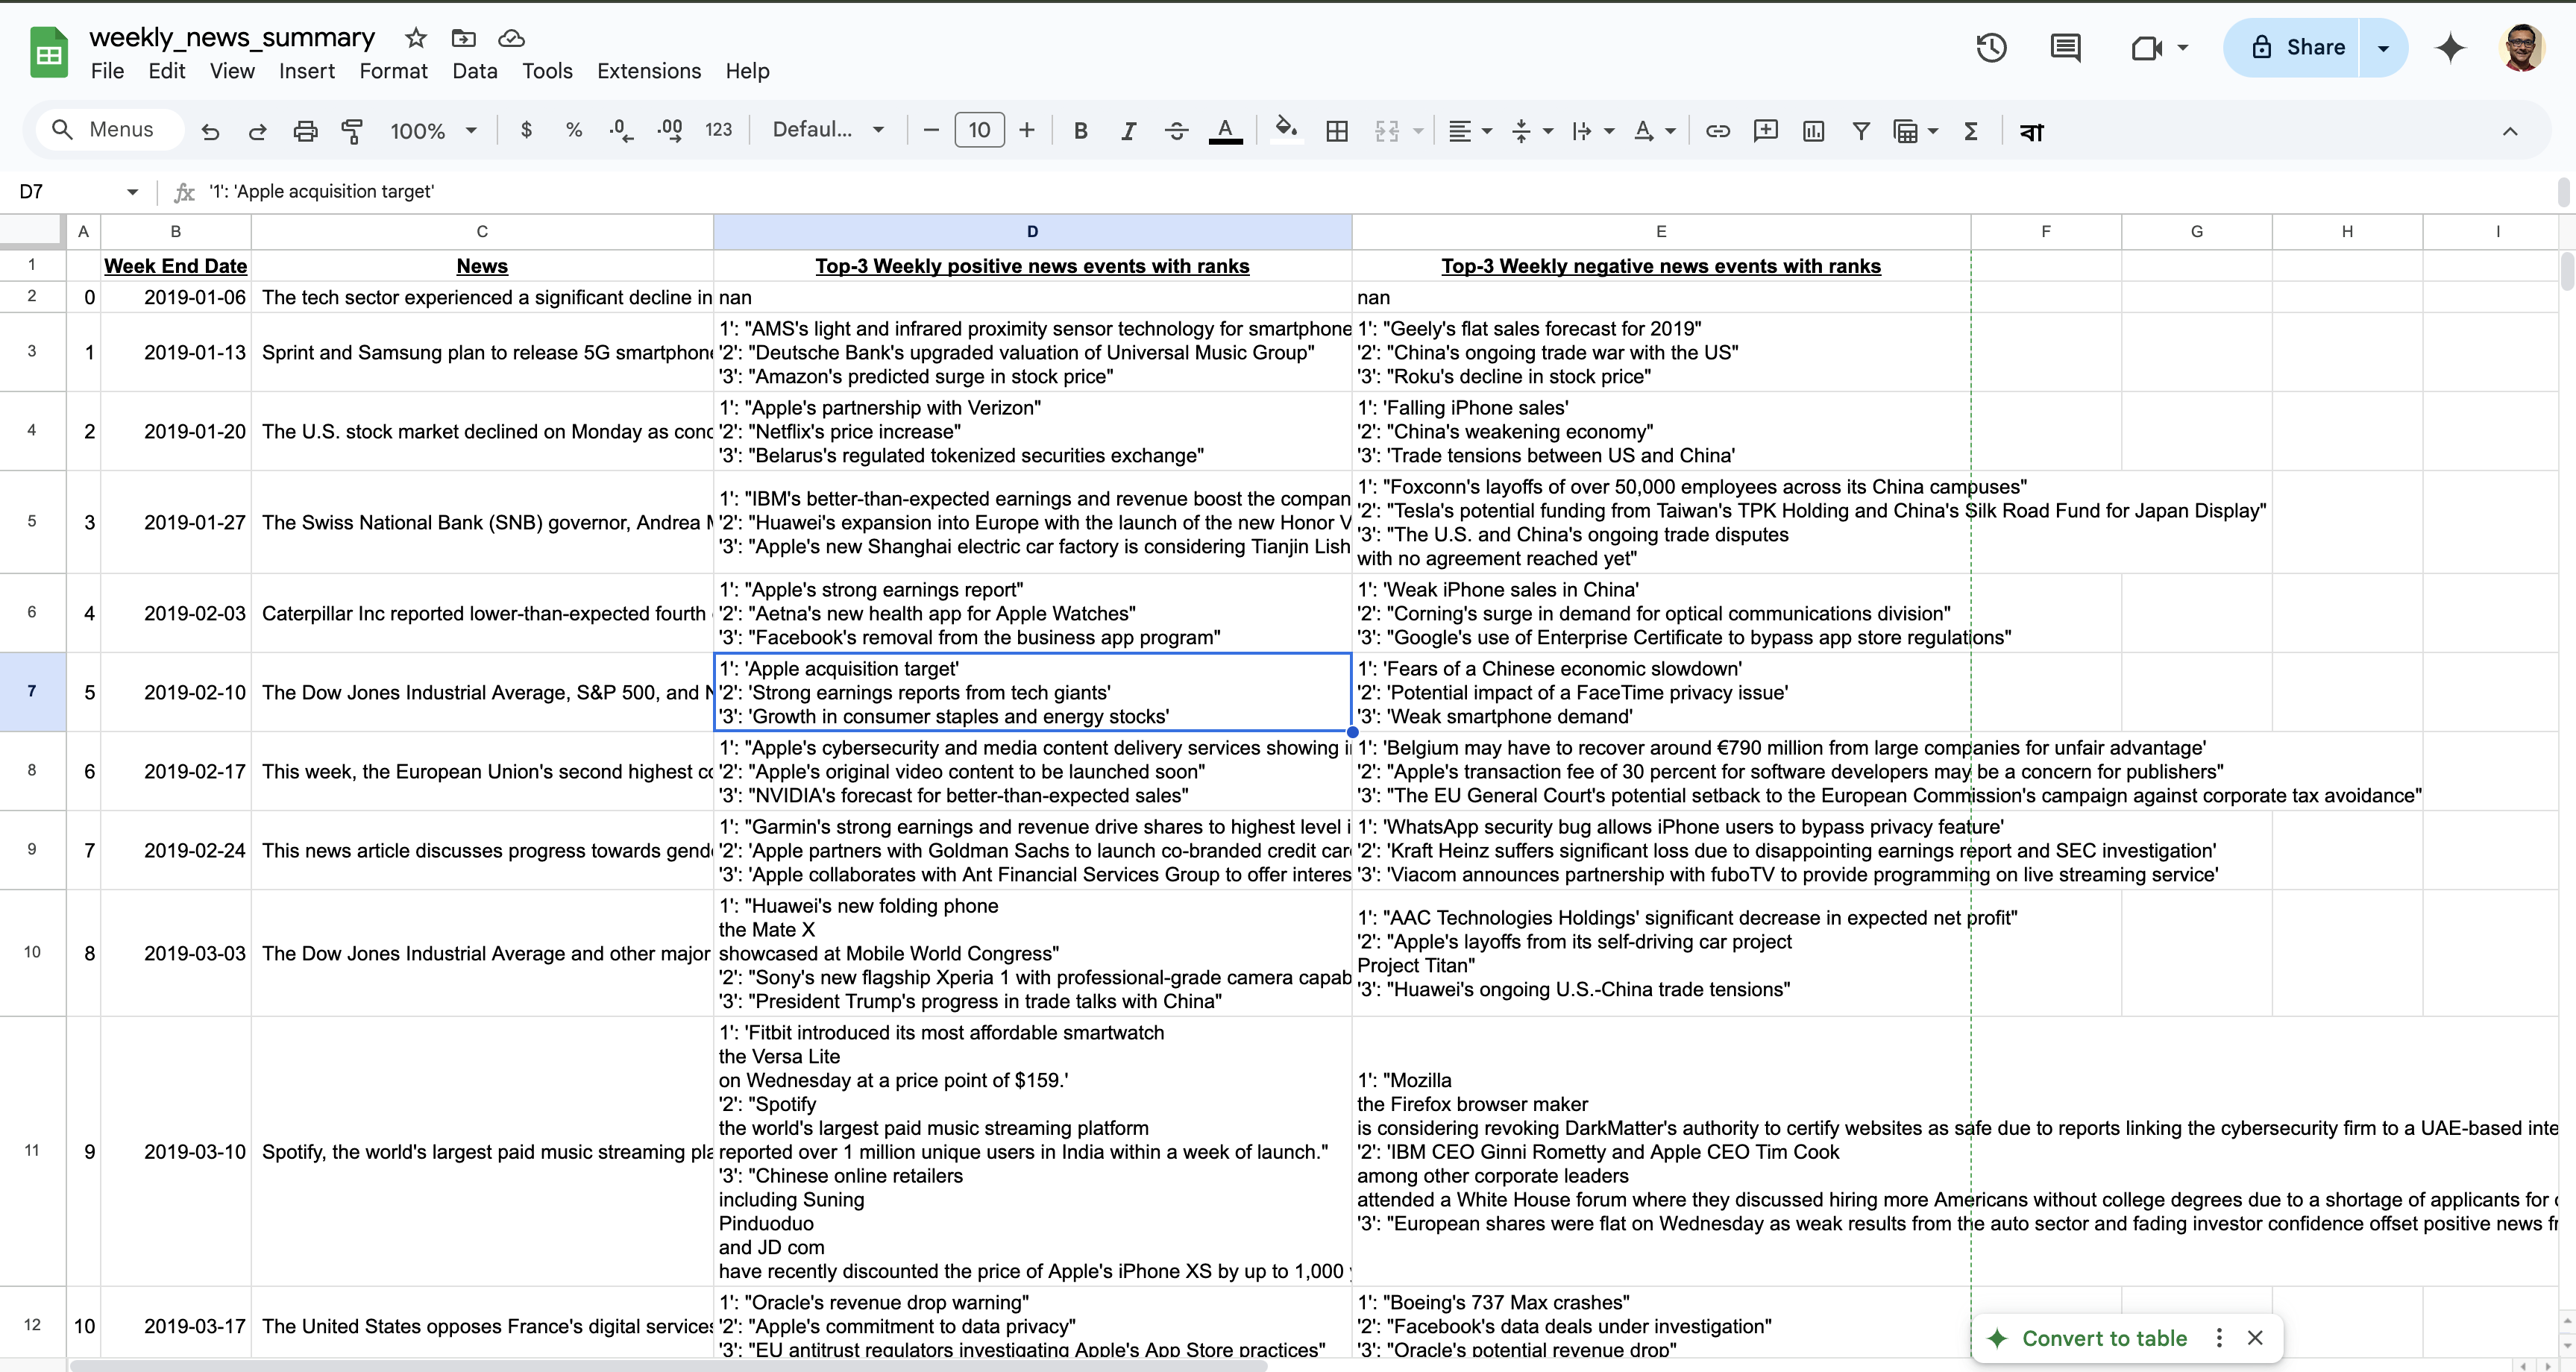

## **Conclusions and Recommendations**

**Conclusions:**

- The use of Sentence Transformer embeddings combined with a Decision Tree classifier provided the most balanced performance in sentiment classification.
- Models using static embeddings like Word2Vec and GloVe exhibited severe overfitting.
- The classification models struggled most with differentiating between neutral and positive/negative sentiment.
- Class imbalance in the dataset may have contributed to misclassification.


**Business Recommendations:**

- The Sentence Transformer + Decision Tree model for automated sentiment analysis of financial news may need continuous monitoring.
- There is a need to enhance model performance by incorporating additional financial indicators or with financial-specific data & models.
- Applying data balancing techniques and collecting more data across all sentiment classes will be beneficial.
- Periodically train the model with updated financial news data and market conditions for future improvement.
- Use positive and negative news event summaries to train models with reinforcement learning using human-provided feedback on sentiment analysis.
- The business can use the positive and negative news event summaries to assess market sentiment and adjust their trading decisions accordingly.



##                 
---

## <font size=6 color='orange'>This section contains an experimental model for sentiment analysis</font>

- This is NOT part of the original assignment, Only for experimentation.

### Model-8 Experiment with FinBERT

**FinBERT Model Overview in the Context of Sentiment Analysis for Financial News**
- **FinBERT is a pre-trained NLP model based on BERT** that has been specifically fine-tuned for **financial sentiment analysis** using datasets from financial reports, analyst statements, and market news.  
- **Designed for sentiment classification in finance**, it categorizes text into **positive, negative, or neutral sentiments**, making it highly suitable for analyzing financial news and its impact on stock prices.  
- Unlike generic sentiment analysis models, **FinBERT understands financial jargon and context**, making it more reliable for this project.  


#### Installing and Initializing the FinBERT Model

In [ ]:
# Installing torch dataset
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.1 MB/s eta 0:00:00


In [ ]:
# Importing necessary libs
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Loading FinBERT tokenizer and model
finbert_model = "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained(finbert_model)
model = AutoModelForSequenceClassification.from_pretrained(finbert_model, num_labels=3)  # 3 sentiment classes (-1, 0, 1)


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

#### Loading, splitting and tokenizing the dataset

In [ ]:
df = pd.read_csv(path+'stock_news.csv') #delimiter="\t", encoding='utf-8')

# Map sentiment labels (-1, 0, 1) to FinBERT's format
label_map = {-1: 0, 0: 1, 1: 2}  # Required for compatibility
df['Label'] = df['Label'].map(label_map)

# Splitting into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['News'], df['Label'], test_size=0.2, random_state=42)

# Tokenizing dataset
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)

# Converting to Hugging Face dataset format
train_dataset = Dataset.from_dict({"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"], "labels": train_labels.tolist()})
val_dataset = Dataset.from_dict({"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"], "labels": val_labels.tolist()})

#### Creating the Trainer object with train & validation dataset. And Training the model

In [ ]:
training_args = TrainingArguments(
    output_dir="./finbert_results",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amitava-basu (amitava-basu-the-university-of-texas-at-austin) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,No log,1.901664
2,No log,1.173135
3,No log,1.038923
4,No log,1.288727


TrainOutput(global_step=140, training_loss=1.300225067138672, metrics={'train_runtime': 195.7809, 'train_samples_per_second': 5.7, 'train_steps_per_second': 0.715, 'total_flos': 43012877077800.0, 'train_loss': 1.300225067138672, 'epoch': 4.0})

#### Generating predictions for validation dataset, and getting scores against predicted Vs actual validation data.

In [ ]:
predictions = trainer.predict(val_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), axis=1)

# Convert predictions back to original labels
reverse_label_map = {0: -1, 1: 0, 2: 1}
preds = pd.Series(preds.numpy()).map(reverse_label_map)
actual = val_labels.map(reverse_label_map)

# Compute accuracy
from sklearn.metrics import classification_report
print(classification_report(val_labels.map(reverse_label_map), preds))

              precision    recall  f1-score   support

          -1       0.18      0.15      0.16        20
           0       0.53      0.81      0.64        31
           1       0.83      0.26      0.40        19

    accuracy                           0.47        70
   macro avg       0.51      0.41      0.40        70
weighted avg       0.51      0.47      0.44        70



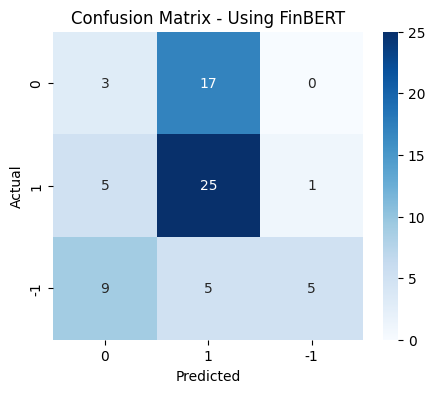

In [ ]:
display_confusion_matrix_pre_predicted(model,preds, actual, 'Using FinBERT')

In [ ]:
print_evaluation_scores_pre_predicted(model,preds, actual, 'Using FinBERT')

Using FinBERT


,F1,Recall,Accuracy,Precision
0,0.438786,0.471429,0.471429,0.512173


#### Final Observations

- The overall accuracy of the FinBERT model is approximately **47.14%**, indicating that the model is only slightly better than random guessing.  
- The confusion matrix shows that the model struggles with the neutral class (0), misclassifying most neutral samples as positive (1).  
- The recall (47.14%) suggests that the model is not consistently identifying all actual instances of each sentiment class, which may lead to missed sentiment signals.
- The precision (51.22%) indicates that while some of the positive predictions are correct, the model still has a high misclassification rate.  
- The F1 score (43.88%) suggests that the model has a poor balance between precision and recall, indicating that further fine-tuning or additional labeled financial data needed for better performance.  
- The model performs best on the positive class (1), correctly predicting 25 out of 31 samples, while performing poorly on the negative class (-1) with many misclassifications.
- To further increase performance, fine-tuning this model on a more targeted dataset may be helpful. only 349 news articles for fine-tuning is likely not sufficient for improving FinBERT's performance significantly.


###     
---